In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

Using TensorFlow backend.


In [2]:
#load data
data = pd.read_csv("/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/fold_3_data.txt",sep = "\t" )
data1 = pd.read_csv("/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/fold_1_data.txt",sep = "\t")
data2 = pd.read_csv("/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/fold_2_data.txt",sep = "\t")
data3 = pd.read_csv("/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/fold_0_data.txt",sep = "\t")
data4 = pd.read_csv("/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/fold_4_data.txt",sep = "\t")

In [3]:
data.shape
total_shape = (data.shape[0]+data1.shape[0]+data2.shape[0]+data3.shape[0]+data4.shape[0],data.shape[1])
print(data4.shape)
print(total_shape)

(3816, 12)
(19370, 12)


In [4]:
data.columns

Index(['user_id', 'original_image', 'face_id', 'age', 'gender', 'x', 'y', 'dx',
       'dy', 'tilt_ang', 'fiducial_yaw_angle', 'fiducial_score'],
      dtype='object')

In [5]:
data.dtypes

user_id               object
original_image        object
face_id                int64
age                   object
gender                object
x                      int64
y                      int64
dx                     int64
dy                     int64
tilt_ang               int64
fiducial_yaw_angle     int64
fiducial_score         int64
dtype: object

In [6]:
data.describe()

,face_id,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
count,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000,3446.000000
mean,1468.835461,919.112014,681.773360,560.560360,560.628265,-9.334010,2.398433,72.891759
std,106.210585,645.883499,434.358154,358.399365,357.300076,74.863682,14.445252,37.003019
min,1322.000000,0.000000,0.000000,80.000000,80.000000,-190.000000,-45.000000,5.000000
25%,1388.000000,465.250000,331.000000,312.000000,312.000000,-80.000000,0.000000,45.000000
50%,1451.500000,808.500000,648.000000,466.000000,472.000000,-5.000000,0.000000,71.000000
75%,1538.000000,1300.000000,976.000000,691.250000,694.000000,5.000000,0.000000,97.000000
max,1743.000000,8721.000000,2226.000000,3130.000000,3104.000000,365.000000,45.000000,210.000000


In [7]:
#first 10 rows of data
data.head(10)

,user_id,original_image,face_id,age,gender,x,y,dx,dy,tilt_ang,fiducial_yaw_angle,fiducial_score
0,113445054@N07,11763777465_11d01c34ce_o.jpg,1322,"(25, 32)",m,1102,296,357,357,-15,0,59
1,113445054@N07,11763777465_11d01c34ce_o.jpg,1323,"(25, 32)",f,1713,580,325,325,-5,0,118
2,113445054@N07,11763777465_11d01c34ce_o.jpg,1324,"(15, 20)",f,1437,664,306,306,5,0,109
3,113445054@N07,11764005785_f21921aea6_o.jpg,1325,"(25, 32)",f,978,229,803,803,-20,-45,16
4,113445054@N07,11763728674_a41d99f71e_o.jpg,1326,"(25, 32)",m,1745,910,242,242,-10,0,55
5,113445054@N07,11764019623_8ffb8ff4f5_o.jpg,1327,"(25, 32)",f,1294,752,1013,1013,-10,30,110
6,113445054@N07,11764019623_8ffb8ff4f5_o.jpg,1325,"(25, 32)",f,798,583,943,943,-10,15,57
7,113445054@N07,11764019623_8ffb8ff4f5_o.jpg,1328,"(25, 32)",f,2632,1069,243,242,15,15,23
8,113445054@N07,11763616596_db19dbce85_o.jpg,1329,34,m,803,854,612,612,5,0,20
9,113445054@N07,11763616596_db19dbce85_o.jpg,1325,"(25, 32)",f,1141,1282,503,504,5,0,72


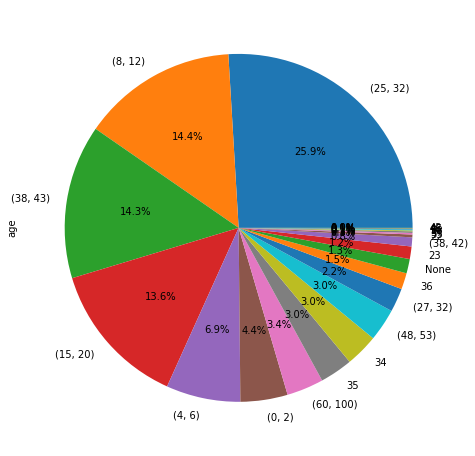

In [8]:
#pie_graph
plt.figure(1, figsize=(8,8))
data.age.value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

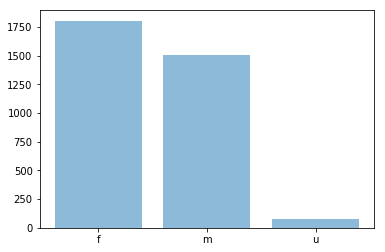

In [9]:
#bar chart
gender = ['f','m','u']
plt.bar(gender,data.gender.value_counts(), align='center', alpha=0.5)
plt.show()

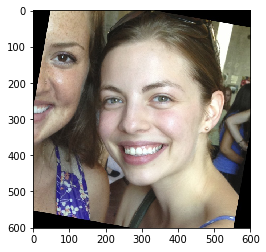

In [10]:
path = "/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/101071073@N04/coarse_tilt_aligned_face.708.10656436223_37c5dafe60_o.jpg"
img = load_img(path)
plt.imshow(img)
plt.show()

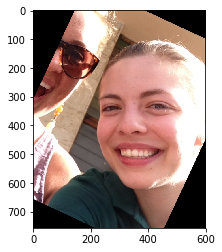

In [11]:
path2 = "/kaggle/input/adience-benchmark-gender-and-age-classification/AdienceBenchmarkGenderAndAgeClassification/faces/101071073@N04/coarse_tilt_aligned_face.708.10658353233_02f5201237_o.jpg"
img = load_img(path2)
plt.imshow(img)
plt.show()